In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from numpy.linalg import inv
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

def draw_point(X, y):
    plt.rcParams['figure.figsize'] = (10.0, 10.0)    
    plt.scatter(X, y, color='k')
    
def curves_lasso(X, y, X_train, y_train, X_test, y_test, deg, alphas):
    plt.rcParams['figure.figsize'] = (10.0, 10.0)    
    plt.figure()
    draw_point(X, y)
    x_min = np.min(X)
    x_max = np.max(X)

    labels = []
    scores = []
    for alpha in alphas:
        lr = Lasso(alpha=alpha, max_iter=1000000, fit_intercept=False)
        X_ = PolynomialFeatures(deg).fit_transform(X_train)
        lr.fit(X_, y_train)

        y_pred = lr.predict(PolynomialFeatures(deg).fit_transform(X_test))
        scores.append("alpha = " + str(alpha) + "\t R2 score: " + str(r2_score(y_test, y_pred)) + \
                      "\t used features count " + str(np.count_nonzero(lr.coef_)))
        x = np.linspace(x_min, x_max, 100)
        x = np.reshape(x, newshape=(x.shape[0], 1))

        x_ = PolynomialFeatures(deg).fit_transform(x)

        plt.plot(x, np.dot(x_, lr.coef_))
        labels.append('alpha = ' + str(alpha))

    plt.legend(labels)
    plt.show()
    for i in scores:
        print(i)

In [2]:
data = pd.read_csv("noisysine.csv")
X = data.drop('y', axis=1).as_matrix()
y = data['y'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# LASSO. degree = 1

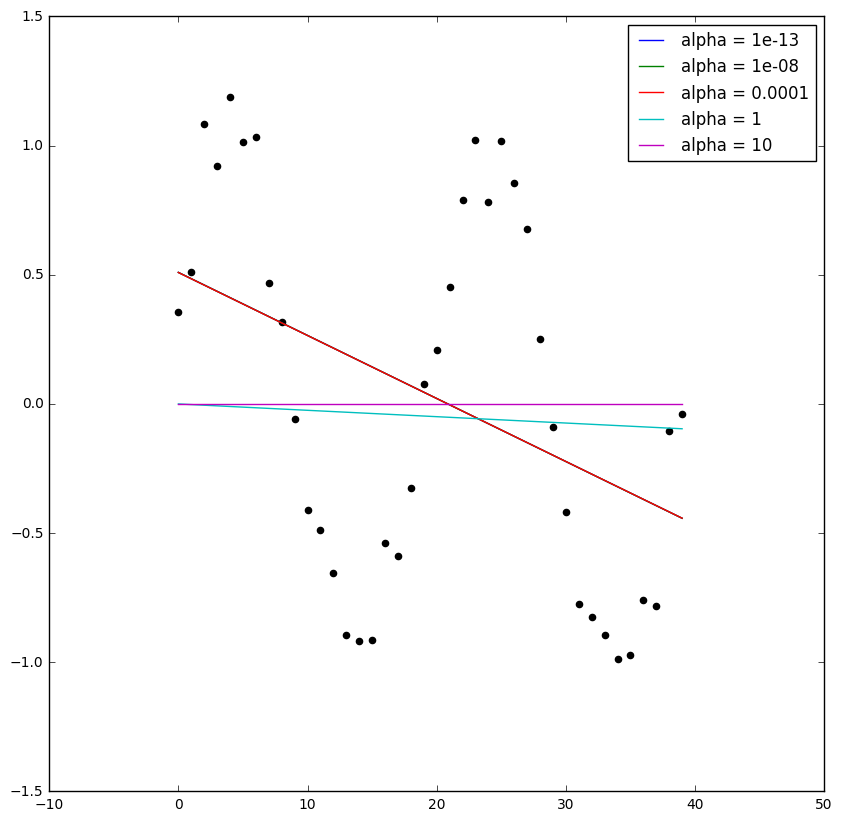

alpha = 1e-13	 R2 score: 0.284171714659	 used features count 2
alpha = 1e-08	 R2 score: 0.2841717105	 used features count 2
alpha = 0.0001	 R2 score: 0.284130033911	 used features count 2
alpha = 1	 R2 score: 0.0474963682996	 used features count 1
alpha = 10	 R2 score: -0.00407895861996	 used features count 0


In [15]:
curves_lasso(X, y, X_train, y_train, X_test, y_test, 1, [1e-13, 1e-8, 1e-4, 1, 10])

# degree = 2

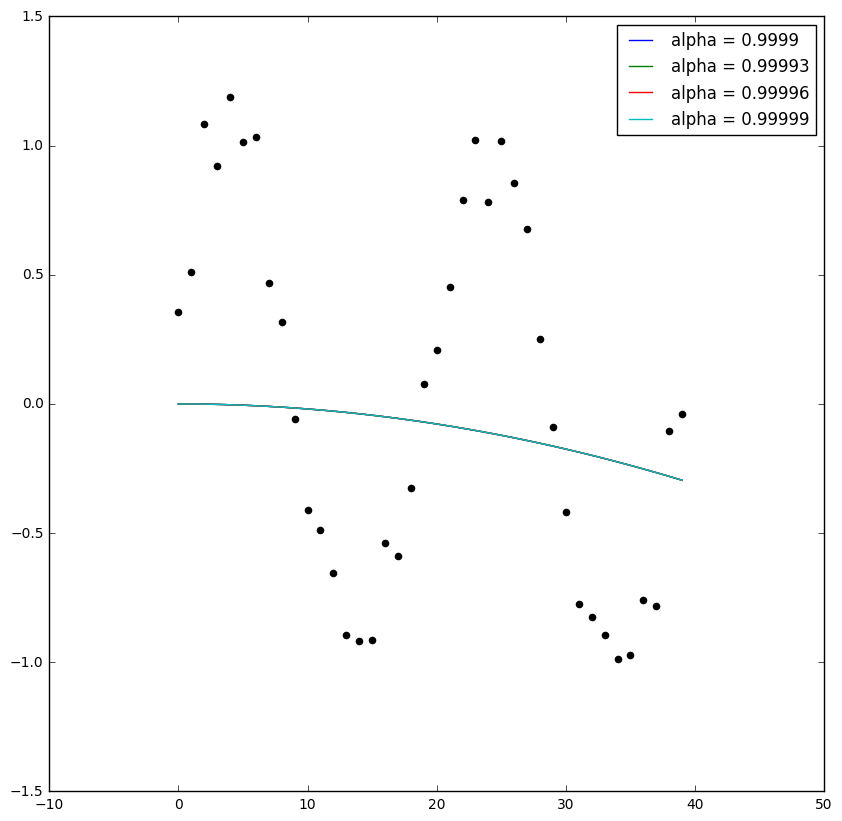

alpha = 0.9999	 R2 score: 0.131344369028	 used features count 1
alpha = 0.99993	 R2 score: 0.131344337508	 used features count 1
alpha = 0.99996	 R2 score: 0.131344305988	 used features count 1
alpha = 0.99999	 R2 score: 0.131344274468	 used features count 1


In [4]:
curves_lasso(X, y, X_train, y_train, X_test, y_test, 2, np.arange(0.9999, 1, 3e-5))

In [5]:
def results_lasso(X_train, y_train, X_test, y_test, deg, alphas):
    for alpha in alphas:
        lr = Lasso(alpha=alpha, max_iter=10000, fit_intercept=False)
        lr.fit(PolynomialFeatures(degree=deg).fit_transform(X_train), y_train)
        
        y_pred = lr.predict(PolynomialFeatures(degree=deg).fit_transform(X_test))
        print("alpha = " + str(alpha) + "\t R2 score: " + str(r2_score(y_test, y_pred)) + \
              "\tused features count " + str(np.count_nonzero(lr.coef_)))

In [6]:
hydro = pd.read_csv('hydrodynamics.csv')
X_hydro = hydro.drop('y', axis=1)
y_hydro = hydro['y']
X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(X_hydro, y_hydro, test_size=0.3)

# hydrodynamics. degree = 2

In [29]:
results_lasso(X_h_train, y_h_train, X_h_test, y_h_test, 2, np.arange(0.001, 0.0017, 1e-4))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha = 0.001	 R2 score: 0.928368273178	used features count 26
alpha = 0.0011	 R2 score: 0.927977118845	used features count 26
alpha = 0.0012	 R2 score: 0.927557976537	used features count 24
alpha = 0.0013	 R2 score: 0.927094224982	used features count 24
alpha = 0.0014	 R2 score: 0.9266264518	used features count 24
alpha = 0.0015	 R2 score: 0.926152704599	used features count 24
alpha = 0.0016	 R2 score: 0.925671918064	used features count 24


In [30]:
def draw_point(X, y):
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.figure()
    plt.scatter(X, y, color='k')
    
def curves_elastic_net(X, y, X_train, y_train, X_test, y_test, deg, alphas, l1_ratios):
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    draw_point(X, y)
    x_min = np.min(X)
    x_max = np.max(X)

    labels = []
    scores = []
    for alpha in alphas:
        for l1_ratio in l1_ratios:
            lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, fit_intercept=False)
            X_ = PolynomialFeatures(deg).fit_transform(X_train)
            lr.fit(X_, y_train)

            y_pred = lr.predict(PolynomialFeatures(deg).fit_transform(X_test))
            scores.append("alpha = " + str(alpha) + "\tl1_ratio = " + str(l1_ratio) + \
                  "\t R2 score: " + str(r2_score(y_test, y_pred)) + \
                  "\tused features count" + str(np.count_nonzero(lr.coef_)))

            x = np.linspace(x_min, x_max, 100)
            x = np.reshape(x, newshape=(x.shape[0], 1))

            x_ = PolynomialFeatures(deg).fit_transform(x)

            plt.plot(x, np.dot(x_, lr.coef_))
        labels.append('alpha = ' + str(alpha))

    plt.legend(labels)
    plt.show()
    for i in scores:
        print(i)

# ELASTICNET. degree = 10

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


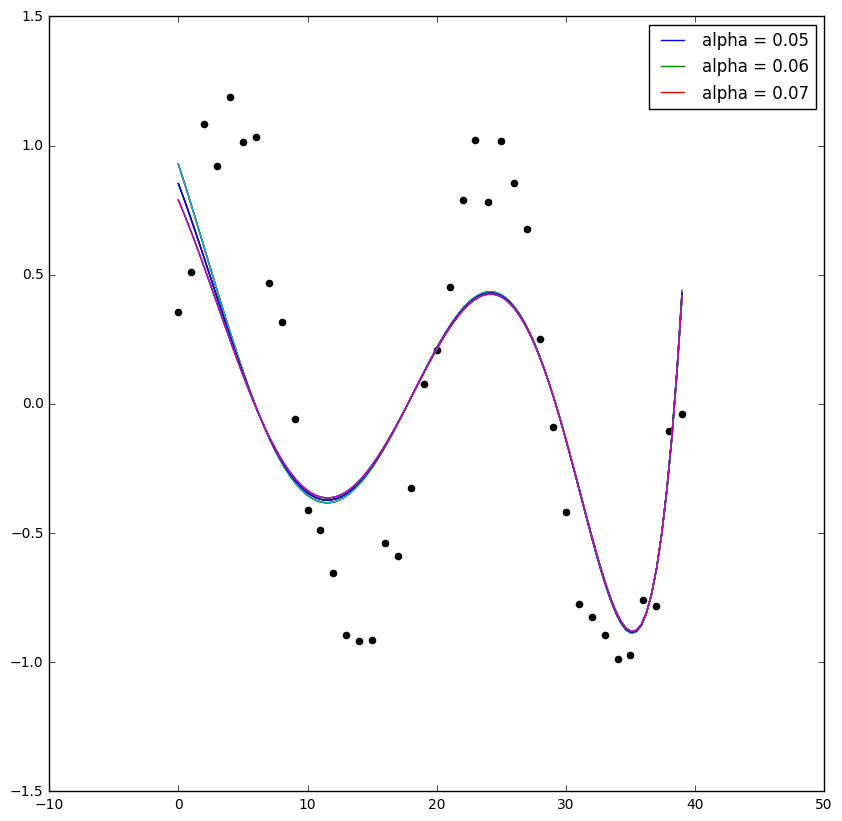

alpha = 0.05	l1_ratio = 1e-06	 R2 score: 0.597313741968	used features count8
alpha = 0.05	l1_ratio = 3.1e-05	 R2 score: 0.597314474932	used features count8
alpha = 0.05	l1_ratio = 6.1e-05	 R2 score: 0.597315207897	used features count8
alpha = 0.05	l1_ratio = 9.1e-05	 R2 score: 0.597315940863	used features count8
alpha = 0.06	l1_ratio = 1e-06	 R2 score: 0.600605683397	used features count8
alpha = 0.06	l1_ratio = 3.1e-05	 R2 score: 0.600606527158	used features count8
alpha = 0.06	l1_ratio = 6.1e-05	 R2 score: 0.600607370918	used features count8
alpha = 0.06	l1_ratio = 9.1e-05	 R2 score: 0.600608214676	used features count8
alpha = 0.07	l1_ratio = 1e-06	 R2 score: 0.602366031779	used features count8
alpha = 0.07	l1_ratio = 3.1e-05	 R2 score: 0.602366953726	used features count8
alpha = 0.07	l1_ratio = 6.1e-05	 R2 score: 0.602367875638	used features count8
alpha = 0.07	l1_ratio = 9.1e-05	 R2 score: 0.602368797559	used features count8


In [41]:
curves_elastic_net(X, y, X_train, y_train, X_test, y_test, \
                             7, np.arange(5e-2, 7e-2, 1e-2), np.arange(1e-6, 1e-4, 3e-5))



In [10]:
def elastic_net(X_train, y_train, X_test, y_test, deg, alphas, l1_ratios):
    for alpha in alphas:
        for l1_ratio in l1_ratios:
            lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, fit_intercept=False)
            lr.fit(PolynomialFeatures(degree=deg).fit_transform(X_train), y_train)

            y_pred = lr.predict(PolynomialFeatures(degree=deg).fit_transform(X_test))
            print("alpha = " + str(alpha) + "\tl1_ratio = " + str(l1_ratio) + \
                  "\t R2 score: " + str(r2_score(y_test, y_pred)) +\
                  "\tused features count " + str(np.count_nonzero(lr.coef_)))

# hydrodynamics. degree = 3

In [11]:
elastic_net(X_h_train, y_h_train, X_h_test, y_h_test, 3, np.arange(1e-15, 1e-14, 3e-15), np.arange(0, 1, 1e-1))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha = 1e-15	l1_ratio = 0.0	 R2 score: 0.988046698014	used features count 84
alpha = 1e-15	l1_ratio = 0.1	 R2 score: 0.988046698016	used features count 84
alpha = 1e-15	l1_ratio = 0.2	 R2 score: 0.988046698018	used features count 84
alpha = 1e-15	l1_ratio = 0.3	 R2 score: 0.98804669802	used features count 84
alpha = 1e-15	l1_ratio = 0.4	 R2 score: 0.988046698022	used features count 84
alpha = 1e-15	l1_ratio = 0.5	 R2 score: 0.988046698024	used features count 84
alpha = 1e-15	l1_ratio = 0.6	 R2 score: 0.988046698025	used features count 84
alpha = 1e-15	l1_ratio = 0.7	 R2 score: 0.988046698027	used features count 84
alpha = 1e-15	l1_ratio = 0.8	 R2 score: 0.988046698029	used features count 84
alpha = 1e-15	l1_ratio = 0.9	 R2 score: 0.988046698031	used features count 84
alpha = 4e-15	l1_ratio = 0.0	 R2 score: 0.988046697956	used features count 84
alpha = 4e-15	l1_ratio = 0.1	 R2 score: 0.988046697964	used features count 84
alpha = 4e-15	l1_ratio = 0.2	 R2 score: 0.988046697971	used featu